In [42]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# conda install -c conda-forge tqdm 
try:
    from tqdm import tqdm_notebook
except:
    from tqdm.notebook import tqdm as tqdm_notebook
    
import os

# conda install -y -c conda-forge xgboost 
import xgboost as xgb

from utils import *

# Recsys 2020: Twitter

In [24]:
# CHANGE THIS
path_to_data = "/data/Recsys2020/"

In [25]:
from IPython.core.display import display, HTML

# Expand jupyter notebook width
display(HTML("<style>.container { width:100% !important; }</style>"))

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 50)

# Set the width of a column to -1. This tells pandas to display all the content in the cells cell
pd.set_option('display.max_colwidth', -1)

In [26]:
# Training dataset with the desired number of rows
%time df_train = read_data(path_to_data+'training.tsv', N=10000)
df_train.head(5)

CPU times: user 1.03 s, sys: 12 ms, total: 1.04 s
Wall time: 1.04 s


,bert,hashtags,tweet_id,media,links,domains,type,language,timestamp,EWUF_user_id,EWUF_follower_count,EWUF_following_count,EWUF_verified,EWUF_account_creation,EUF_user_id,EUF_follower_count,EUF_following_count,EUF_verified,EUF_account_creation,engagee_follows_engager,reply_timestamp,retweet_timestamp,retweet_comment_timestamp,like_timestamp
0,101\t14120\t131\t120\t120\t188\t119\t11170\t120\t178\t71492\t11274\t10112\t10759\t11274\t11166\t10161\t11127\t102,NaN,BFB529DAB6D384EB83E899A72AB3830D,Photo,NaN,NaN,TopLevel,B9175601E87101A984A50F8A62A1C374,1581018910,1F30A85E612A24B426013978ADB7AE46,39786,32978,False,1322740272,000005C520010F8917EEAB6F5B6EC1C4,17,77,False,1569692352,True,NaN,NaN,NaN,NaN
1,101\t62342\t10858\t54439\t19571\t22480\t7831\t8129\t2215\t4671\t7229\t4368\t2226\t3268\t1965\t53106\t119\t14120\t131\t120\t120\t188\t119\t11170\t120\t177\t11779\t10418\t10457\t11274\t10874\t11733\t12674\t12396\t10350\t102,NaN,519078C7834E9642508F72A6C2D0F3B7,NaN,788ABAA22F1C4A9D186510C1E3E81F58,892B6E0BC037800B59112CFCB95E3301,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1581244866,9E1FD934C376903895DEEBCC0F6AB920,141726,3232,False,1343181073,000006829BEADA9EEA695CF0C334B426,2,29,False,1568107028,False,NaN,NaN,NaN,1581247087
2,101\t58955\t10898\t103305\t1901\t16181\t7168\t17984\t15221\t2149\t1980\t7168\t17984\t15221\t4388\t1943\t7168\t15219\t28224\t27849\t22946\t27607\t119\t1904\t27058\t14244\t5769\t1943\t2738\t1917\t30884\t111806\t35412\t74381\t28224\t50508\t1901\t10060\t112\t489\t112\t10061\t119\t119\t108\t29005\t10230\t108\t7457\t2893\t6101\t14120\t131\t120\t120\t188\t119\t11170\t120\t141\t10305\t25743\t13034\t10729\t11527\t10410\t11369\t102,F0F2FBE57F08E7C4326682B5EDA63E3E\tE78674D323461112D0DCF8010AF5AED3,52AAE9E33EFAC8C478C57B31A9E31ED1,NaN,C06B84A10A75AE4BF4A102AB45CC2ABF,C0F5328C1D36CD4B34D1808012E18D46,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1581250124,BEB3C337B266E2C4769065AD64724329,3044,99,False,1350921963,000006829BEADA9EEA695CF0C334B426,3,30,False,1568107028,False,NaN,NaN,NaN,NaN
3,101\t2435\t5656\t2594\t8279\t8623\t1925\t64126\t14725\t16867\t2072\t7744\t8137\t6224\t3446\t3189\t1939\t15355\t102,NaN,89C1298C55EB3D68E2784F0BFB69E6F8,NaN,NaN,NaN,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1580958805,9E1FD934C376903895DEEBCC0F6AB920,141370,3235,False,1343181073,000006829BEADA9EEA695CF0C334B426,3,30,False,1568107028,False,NaN,NaN,NaN,NaN
4,101\t56898\t137\t16349\t11530\t11274\t12396\t11779\t11273\t168\t45657\t131\t2038\t78841\t73115\t13894\t5106\t7543\t3670\t1985\t11668\t57743\t21761\t11377\t3393\t4337\t1923\t53106\t10055\t5719\t44360\t10898\t11490\t30297\t10155\t12360\t24310\t11312\t26554\t32308\t56910\t22526\t3820\t15219\t15752\t25204\t6483\t1911\t47359\t18825\t28224\t51143\t15221\t1882\t119\t119\t2999\t6076\t1947\t28442\t30884\t18767\t131\t14120\t131\t120\t120\t188\t119\t11170\t120\t14074\t10107\t66025\t10686\t19282\t11703\t10237\t10457\t119\t108\t16349\t11530\t11490\t13998\t24310\t108\t141\t10457\t11490\t10556\t100\t102,C38F925CF76111352C3FE0EFBA8F32B6\t7E881DBFB094FB9EC5974FD3958C5747,D1F22992B720504FF058991B83A4C4D8,NaN,2E2690EDB8C577AB6B54D0CD6AE94AC9,3896E26D12C903F0A00B6B1BE9A9BEA3,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1581335128,E4CF13FFB0C7B8AC747476D57543C413,3264,39,False,1520131887,000006829BEADA9EEA695CF0C334B426,3,29,False,1568107028,False,NaN,NaN,NaN,NaN


In [27]:
# Load the validation dataset. Remove parameter N or set it to None to load all the file
%time df_val = read_data(path_to_data+'val.tsv', N=1000)
df_val.head(1)

CPU times: user 96 ms, sys: 4 ms, total: 100 ms
Wall time: 102 ms


,bert,hashtags,tweet_id,media,links,domains,type,language,timestamp,EWUF_user_id,EWUF_follower_count,EWUF_following_count,EWUF_verified,EWUF_account_creation,EUF_user_id,EUF_follower_count,EUF_following_count,EUF_verified,EUF_account_creation,engagee_follows_engager
0,101\t56898\t137\t10730\t107105\t59578\t17394\t17394\t17394\t131\t14120\t131\t120\t120\t188\t119\t11170\t120\t150\t10305\t11396\t10731\t11373\t10575\t10457\t11127\t10707\t102,NaN,408DB1803264B5FF55F73EC06BE9BD77,Photo\tPhoto\tPhoto\tPhoto,NaN,NaN,Retweet,B9175601E87101A984A50F8A62A1C374,1582021842,825B003667DF15692B1704F44DAFD1A2,186,100,False,1263078566,000013315386492275CCBF7AEF293EF0,139,956,False,1335110299,False


## The dumbest submission

In [28]:
# The dumbest submission, assigns 0.5 to all the columns. See code inside utils.py
df_val = fill_df_with_value(df_val, 0.5)

# Create a submission
create_submission(df_val, 'dummy_submission', create_zip=True)

Directory  submissions/dummy_submission  already exists



Zipping... DONE!


## Improving with XGBoost

### Feature 1: Engagee follows engager?

In [29]:
df_train['feature01_is_following'] = df_train['engagee_follows_engager']*1
df_val['feature01_is_following'] = df_val['engagee_follows_engager']*1

In [30]:
df_train.loc[:,['engagee_follows_engager','feature01_is_following']].head()

,engagee_follows_engager,feature01_is_following
0,True,1
1,False,0
2,False,0
3,False,0
4,False,0


### Feature 2: How many Photos / GIFs does the tweet contain, apart from the text?

In [31]:
df_train['feature02_media_count'] = df_train['media'].str.split('\t').str.len().fillna(0)
df_val['feature02_media_count'] = df_val['media'].str.split('\t').str.len().fillna(0)

In [32]:
df_train.loc[:,['media','feature02_media_count']].sort_values(by='feature02_media_count', ascending=False).head()

,media,feature02_media_count
9999,Photo\tPhoto\tPhoto\tPhoto,4.0
4391,Photo\tPhoto\tPhoto\tPhoto,4.0
8146,Photo\tPhoto\tPhoto\tPhoto,4.0
4346,Photo\tPhoto\tPhoto\tPhoto,4.0
8170,Photo\tPhoto\tPhoto\tPhoto,4.0


### Feature 3: what is the ratio between followers and followed users?

In [33]:
df_train['feature03_ratio'] = df_train['EUF_follower_count'].astype(float)/df_train['EUF_following_count'].astype(float)
df_val['feature03_ratio'] = df_val['EUF_follower_count'].astype(float)/df_val['EUF_following_count'].astype(float)

In [34]:
df_train.loc[:, ['EUF_follower_count', 'EUF_following_count', 'feature03_ratio']].head()

,EUF_follower_count,EUF_following_count,feature03_ratio
0,17,77,0.220779
1,2,29,0.068966
2,3,30,0.100000
3,3,30,0.100000
4,3,29,0.103448


#### Store user_id, tweet_id that we have to include in the submission file

In [35]:
df_val_ident = df_val.loc[:, ['EUF_user_id', 'tweet_id']]

#### Create target column (in this example, we will predict LIKE)

In [36]:
df_train_like = df_train.loc[:, 'like_timestamp'].notna()*1

In [37]:
print(df_train['like_timestamp'].head())

0    NaN       
1    1581247087
2    NaN       
3    NaN       
4    NaN       
Name: like_timestamp, dtype: object


In [38]:
print(df_train_like.head())

0    0
1    1
2    0
3    0
4    0
Name: like_timestamp, dtype: int64


#### Drop columns we will not use

In [39]:
df_train.columns

Index(['bert', 'hashtags', 'tweet_id', 'media', 'links', 'domains', 'type',
       'language', 'timestamp', 'EWUF_user_id', 'EWUF_follower_count',
       'EWUF_following_count', 'EWUF_verified', 'EWUF_account_creation',
       'EUF_user_id', 'EUF_follower_count', 'EUF_following_count',
       'EUF_verified', 'EUF_account_creation', 'engagee_follows_engager',
       'reply_timestamp', 'retweet_timestamp', 'retweet_comment_timestamp',
       'like_timestamp', 'feature01_is_following', 'feature02_media_count',
       'feature03_ratio'],
      dtype='object')

In [40]:
df_train = df_train.loc[:, ['feature01_is_following', 'feature02_media_count', 'feature03_ratio']]
df_val = df_val.loc[:, ['feature01_is_following', 'feature02_media_count', 'feature03_ratio']]

### We can use these three features to train a simple XGBoost

In [47]:
# 80% training, 20% validation
x, evalx, y, evaly = train_test_split(df_train, df_train_like, test_size=0.2)

In [49]:
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=42, 
                            n_jobs=-1, eval_metric='aucpr', max_depth=5,
                            n_estimators=1000)

xgb_model.fit(x, y,
             verbose=10,
             eval_set=[
                 (x, y),
                 (evalx, evaly)])

[0]	validation_0-aucpr:0.52561	validation_1-aucpr:0.50147
[10]	validation_0-aucpr:0.60137	validation_1-aucpr:0.52832
[20]	validation_0-aucpr:0.64108	validation_1-aucpr:0.53748
[30]	validation_0-aucpr:0.67720	validation_1-aucpr:0.54131
[40]	validation_0-aucpr:0.70091	validation_1-aucpr:0.54484
[50]	validation_0-aucpr:0.72075	validation_1-aucpr:0.54952
[60]	validation_0-aucpr:0.73664	validation_1-aucpr:0.54951
[70]	validation_0-aucpr:0.75341	validation_1-aucpr:0.55108
[80]	validation_0-aucpr:0.76704	validation_1-aucpr:0.55775
[90]	validation_0-aucpr:0.77071	validation_1-aucpr:0.56058
[100]	validation_0-aucpr:0.78050	validation_1-aucpr:0.56288
[110]	validation_0-aucpr:0.78597	validation_1-aucpr:0.56201
[120]	validation_0-aucpr:0.79120	validation_1-aucpr:0.56437
[130]	validation_0-aucpr:0.79338	validation_1-aucpr:0.56253
[140]	validation_0-aucpr:0.80141	validation_1-aucpr:0.56277
[150]	validation_0-aucpr:0.80271	validation_1-aucpr:0.56248
[160]	validation_0-aucpr:0.80632	validation_1-aucpr

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='aucpr',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, objective='binary:logistic', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

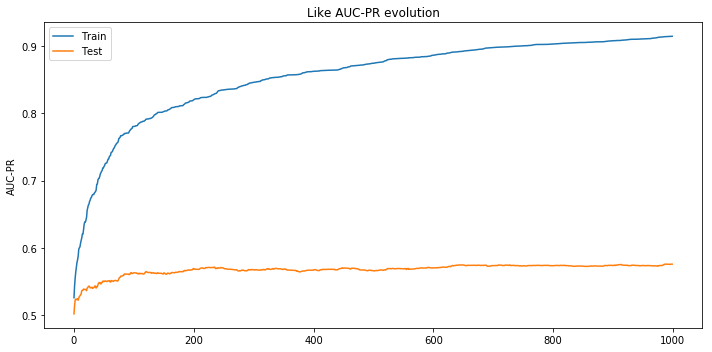

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,5))
 
results = xgb_model.evals_result()
epochs = len(results['validation_0']['aucpr'])
x_axis = range(0, epochs)

# plot aucpr evolution
ax = fig.gca()

ax.plot(x_axis, results['validation_0']['aucpr'], label='Train')
ax.plot(x_axis, results['validation_1']['aucpr'], label='Test')
ax.legend()
ax.set_ylabel('AUC-PR')
ax.set_title('Like AUC-PR evolution')

plt.tight_layout()
plt.show()

### Predict and submit

In [52]:
df_val['like'] = xgb_model.predict(df_val)
df_val.head()

,feature01_is_following,feature02_media_count,feature03_ratio,like
0,0,4.0,0.145397,0.301948
1,0,1.0,0.164948,0.337970
2,1,3.0,0.663781,0.776445
3,0,0.0,0.664740,0.328252
4,0,1.0,0.121970,0.284540


Now it's time for you to do something! Improve the features, add new ones, combine different...

Ah! And you also have to create predictions for RETWEET, RETWEET_COMMENT and REPLY.

When you have everything ready, create a submission with **all validation data** (use the `read_data(path_to_data+'val.tsv', N=None)` function) and upload your first submission to the web!